In [1]:
import mne

In [10]:
%matplotlib widget

In [5]:
raw = mne.io.read_raw_fif('BCIproject_trial-4_raw.fif.gz', preload=True)

Opening raw data file BCIproject_trial-4_raw.fif.gz...
    Range : 0 ... 8437 =      0.000 ...    33.748 secs
Ready.
Reading 0 ... 8437  =      0.000 ...    33.748 secs...


In [6]:
raw = raw.crop(2)

In [7]:
raw = raw.filter(5, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 413 samples (1.652 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

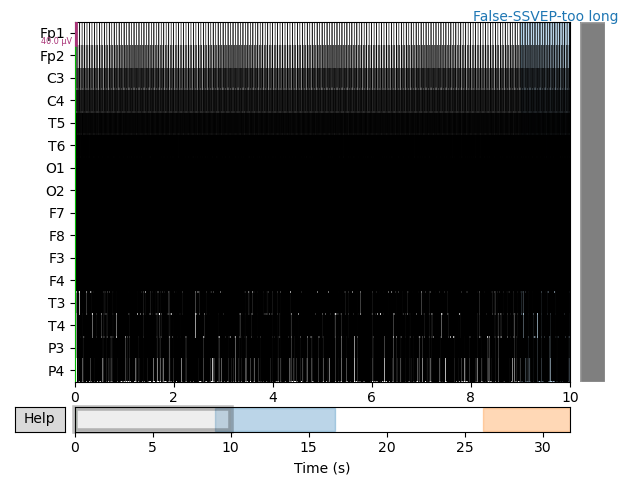

In [11]:
raw.plot()

In [12]:
raw.annotations

<Annotations | 2 segments: False-SSVEP-too long (1), True-SSVEP-too long (1)>

In [13]:
raw.annotations[0]

OrderedDict([('onset', 11.012832),
             ('duration', 7.69126033782959),
             ('description', 'False-SSVEP-too long'),
             ('orig_time', None)])

In [15]:
raw.annotations[1]

OrderedDict([('onset', 28.202219),
             ('duration', 5.549779891967773),
             ('description', 'True-SSVEP-too long'),
             ('orig_time', None)])

In [19]:
event_id = {'False-SSVEP-too long': 0, 'True-SSVEP-too long': 1}
events, eventid = mne.events_from_annotations(raw, event_id=event_id)

Used Annotations descriptions: ['False-SSVEP-too long', 'True-SSVEP-too long']


In [23]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = mne.Epochs(raw, events, event_id, tmin=0, tmax=5, picks=picks, preload=True, baseline=None)

Not setting metadata
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2 events and 1251 original time points ...
0 bad epochs dropped


In [24]:
epochs

<Epochs |  2 events (all good), 0 - 5 sec, baseline off, ~361 kB, data loaded,
 'False-SSVEP-too long': 1
 'True-SSVEP-too long': 1>

In [26]:
epochs[0].get_data()

array([[[  6.65852966,   7.99064858,   9.2685266 , ...,   3.61846743,
           5.32418876,   6.9692996 ],
        [ 24.39482099,  27.12518004,  27.62030272, ...,  15.35980581,
          20.56825823,  23.86719503],
        [ 41.71294644,  40.12087136,  31.67013822, ...,  29.77953397,
          39.04631374,  43.75135093],
        ...,
        [ 30.6970591 ,  32.18242194,  28.00773826, ..., -17.41406818,
         -70.63346141, -78.65006721],
        [-36.4869943 , -12.62955972,  33.07879096, ...,  15.71677517,
           5.22300291,  -6.45392468],
        [ -4.2763893 ,   4.56697644,  41.08166384, ..., -23.43308376,
          14.6715764 ,  24.28380732]]])